# Visualization of VVR groups 
Everything you need to know about matplotlib can be find in its documentation: https://matplotlib.org/stable/

In [1]:
%matplotlib inline 
import numpy
import pandas
import matplotlib.pyplot as plt

In [3]:
clean_donor_info = pandas.read_csv('/Users/dionnespaltman/Desktop/V3/processed_donor_info.csv')
# # VVR_scores_final = pandas.read_csv('/Users/dionnespaltman/Desktop/V3/VVR_scores_final.csv')
# complete_dataset = pandas.read_csv('/Users/dionnespaltman/Desktop/V4/complete_dataset.csv')
standardized_complete_dataset = pandas.read_csv('/Users/dionnespaltman/Desktop/V4/standardized_complete_dataset.csv')

## 1st graph 
- On the y-axis the number of donors.
- On the x-axis the VVR during and post donation scores (stages 4, 5, 6, 7). 
- Bar graph with condition. 
- Adding a dotted graph where the mean is (mean = 30.515625)

Chat GPT input: 
I have a dataframe called VVR_scores_final. I want to create a bar chart with on x-axis the VVR score (this is the column sum_4567). The x-axis should go from approximately 30 to 100 (so this is the VVR score). The y-axis is the number of donors with a certain score. Then I want to divide the bars into 3 parts, depending on the Condition (1, 2 or 3). It should all be done using matplotlib. 

In [5]:
display(standardized_complete_dataset)

,Unnamed: 0,ID,Sum_12,Sum_4567,VVR_1,VVR_2,Sum_456,VVR_group,Condition,Date,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,0,23,24.0,37.0,13.0,11.0,27.0,0,2,2020-08-01,...,-0.289518,0.458331,-0.574983,-0.554028,-0.333560,0.221977,0.345618,0.548923,0.603537,0.429001
1,1,24,23.0,37.0,12.0,11.0,28.0,0,2,2020-01-22,...,1.793425,0.458331,2.294469,2.317495,0.203487,-0.260024,-0.030426,0.619766,-0.659902,-0.281599
2,2,25,28.0,44.0,16.0,12.0,33.0,1,2,2020-05-02,...,0.557817,0.458331,0.196854,0.400873,-0.376228,0.033873,0.204639,-0.135892,0.093018,0.147314
3,3,26,30.0,37.0,15.0,15.0,29.0,0,1,2020-06-02,...,-0.394321,0.458331,-0.847716,-0.761866,-0.868821,-0.323805,-0.084215,0.541052,-1.092069,-0.441394
4,4,27,22.0,39.0,11.0,11.0,31.0,0,2,2020-06-02,...,1.682971,1.863336,-2.230621,0.556978,2.456784,1.071168,0.914462,0.651252,3.692845,1.996765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,99,140,16.0,32.0,8.0,8.0,24.0,0,3,2021-05-26,...,-0.033310,0.458331,-0.446575,-0.318795,0.861706,0.199480,0.329100,0.210451,0.318307,0.327148
100,100,142,20.0,34.0,11.0,9.0,26.0,0,3,2021-05-31,...,-0.853016,0.458331,-1.199405,-1.246095,-0.067533,-0.585183,-0.317237,-0.537335,-0.522513,-0.509273
101,101,144,24.0,35.0,12.0,12.0,27.0,0,3,2021-01-06,...,-0.565965,0.458331,-0.851589,-0.878346,-0.720364,-0.806836,-0.534298,-0.340549,-0.961821,-0.835709
102,102,145,20.0,37.0,11.0,9.0,28.0,0,1,2021-02-06,...,-0.485857,0.366881,-0.548002,-0.665071,1.190821,0.027513,0.199753,0.076637,-0.006872,0.113717


In [6]:
# Assuming VVR_scores_final is your DataFrame and 'sum_12' is the column containing VVR sum scores

# Calculate the minimum and maximum values of the column
min_value = standardized_complete_dataset['Sum_12'].min()
max_value = standardized_complete_dataset['Sum_12'].max()

print("Range of 'sum_12' column:")
print("Minimum value:", min_value)
print("Maximum value:", max_value)


Range of 'sum_12' column:
Minimum value: 16.0
Maximum value: 42.0


/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_2242/108990241.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


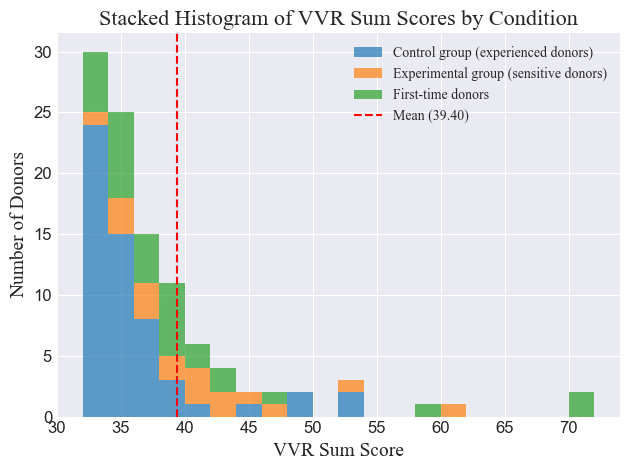

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Assuming VVR_scores_final is your DataFrame and 'sum_4567' is the column containing VVR sum scores

# Filter the DataFrame to include only rows with VVR sum scores between 10 and 100
filtered_df = standardized_complete_dataset[(standardized_complete_dataset['Sum_4567'] >= 10) & (standardized_complete_dataset['Sum_4567'] <= 100)]

# Create a stacked histogram
plt.hist([filtered_df[filtered_df['Condition'] == 1]['Sum_4567'],
          filtered_df[filtered_df['Condition'] == 2]['Sum_4567'],
          filtered_df[filtered_df['Condition'] == 3]['Sum_4567']],
         bins=20, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7, stacked=True,
         label=['Control group (experienced donors)',
                'Experimental group (sensitive donors)',
                'First-time donors'])
# Add a vertical dotted line for the mean
mean_value = 39.4
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')

# Set labels and title
plt.xlabel('VVR Sum Score', fontsize=14, fontname='Times New Roman')
plt.ylabel('Number of Donors', fontsize=14, fontname='Times New Roman')
plt.title('Stacked Histogram of VVR Sum Scores by Condition', fontsize=16, fontname='Times New Roman')

# Add legend with Times New Roman font
plt.legend(prop={'family': 'Times New Roman'})

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Increase the font size of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# 2nd graph 

/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_2242/3413174265.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


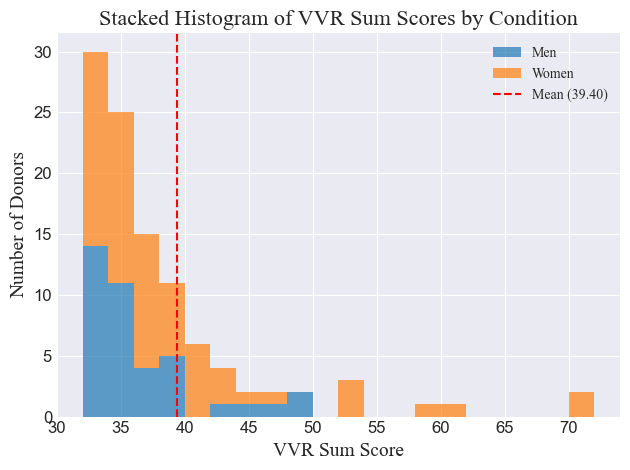

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Assuming VVR_scores_final is your DataFrame and 'sum_4567' is the column containing VVR sum scores

# Filter the DataFrame to include only rows with VVR sum scores between 10 and 100
filtered_df = standardized_complete_dataset[(standardized_complete_dataset['Sum_4567'] >= 10) & (standardized_complete_dataset['Sum_4567'] <= 100)]

# Create a stacked histogram
plt.hist([filtered_df[filtered_df['Gender'] == 1]['Sum_4567'],
          filtered_df[filtered_df['Gender'] == 2]['Sum_4567']],
         bins=20, color=['#1f77b4', '#ff7f0e'], alpha=0.7, stacked=True,
         label=['Men',
                'Women'])
# Add a vertical dotted line for the mean
mean_value = 39.4
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Mean ({mean_value:.2f})')

# Set labels and title
plt.xlabel('VVR Sum Score', fontsize=14, fontname='Times New Roman')
plt.ylabel('Number of Donors', fontsize=14, fontname='Times New Roman')
plt.title('Stacked Histogram of VVR Sum Scores by Condition', fontsize=16, fontname='Times New Roman')

# Add legend with Times New Roman font
plt.legend(prop={'family': 'Times New Roman'})

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Increase the font size of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# 3rd graph 
- On the x-axis the 'Stage'. There should be 7 times 3 box plots. So three plots per each stage. The three plots are one per Condition (1 = control, 2 = experimental and 3 = sensitive)/ 
- On the y-axis the VVR ratings. 
- clean_donor_info is the dataframe where all the information is.  

In [12]:
display(clean_donor_info)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Index,ID,Stage,Gender,Age,Date,Location,...,Weakness,Lightheadedness,Fear,Tension,Stress,Nervousness,Physical_sum,Psychological_sum,na.rm,sum_VVR
0,0,0,0,0,5,1.0,2,33.0,2019-10-21,0,...,1.0,1.0,2.0,2.0,2.0,2.0,4.0,8.0,True,12.0
1,1,1,1,1,5,2.0,2,33.0,2019-10-21,0,...,1.0,1.0,1.0,2.0,1.0,2.0,4.0,6.0,True,10.0
2,2,2,2,2,5,3.0,2,33.0,2019-10-21,0,...,1.0,1.0,1.0,2.0,1.0,2.0,4.0,6.0,True,10.0
3,3,3,3,3,5,4.0,2,33.0,2019-10-21,0,...,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,True,9.0
4,4,4,4,4,5,5.0,2,33.0,2019-10-21,0,...,1.0,1.0,1.0,1.0,1.0,2.0,4.0,5.0,True,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2044,2044,2044,2052,332,2.0,2,21.0,2022-12-19,3,...,1.0,1.0,2.0,3.0,3.0,4.0,4.0,12.0,True,16.0
2045,2045,2045,2045,2053,332,4.0,2,21.0,2022-12-19,3,...,1.0,1.0,3.0,3.0,3.0,5.0,4.0,14.0,True,18.0
2046,2046,2046,2046,2054,332,5.0,2,21.0,2022-12-19,3,...,1.0,1.0,2.0,3.0,3.0,4.0,4.0,12.0,True,16.0
2047,2047,2047,2047,2055,332,6.0,2,21.0,2022-12-19,3,...,1.0,1.0,2.0,2.0,2.0,3.0,4.0,9.0,True,13.0


/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_9993/339022101.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


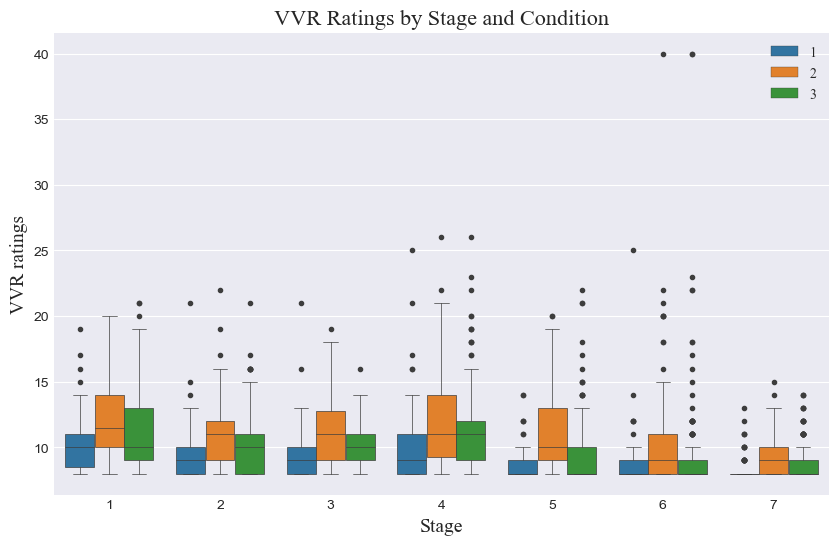

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clean_donor_info is your DataFrame containing the necessary data

# Set the style to a modern style
plt.style.use('seaborn-darkgrid')

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the order of conditions
condition_order = [1, 2, 3]

# Plot boxplots for each stage and condition
sns.boxplot(x='Stage', y='sum_VVR', hue='Condition', data=clean_donor_info, order=range(1, 8), hue_order=condition_order, linewidth=0.5, flierprops=dict(marker='o', markersize=3))

# Move the legend to the right of the graph
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels for x-axis and y-axis and title
plt.xlabel('Stage', fontsize=14, fontname='Times New Roman')
plt.ylabel('VVR ratings',  fontsize=14, fontname='Times New Roman')
plt.title('VVR Ratings by Stage and Condition', fontsize=16, fontname='Times New Roman')

# Add legend with Times New Roman font
plt.legend(prop={'family': 'Times New Roman'})

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


## 3rd graph 